Formação Cientista de Dados - Sessão 34  
Deep Learning 1

In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

Text(0.5, 1.0, '0')

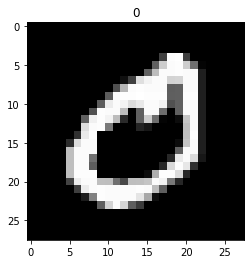

In [2]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(x_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [3]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
x_treinamento = x_treinamento.reshape((len(x_treinamento), np.prod(x_treinamento.shape[1:])))
x_teste = x_teste.reshape((len(x_teste), np.prod(x_teste.shape[1:])))
x_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [4]:
# Transformação dos dados para float para podermos normalizar os dados
x_treinamento = x_treinamento.astype('float32')
x_teste = x_teste.astype('float32')

In [5]:
# Normalização (255 é o valor máximo de um pixel)
x_treinamento /= 255
x_teste /= 255

In [6]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [7]:
# Estruturação da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
# Camada de saída, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [8]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

In [9]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na viarável 'historico' temos o histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
historico = modelo.fit(x_treinamento, y_treinamento, epochs = 20, validation_data = (x_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 1s 624us/step - loss: 0.4412 - accuracy: 0.8649 - val_loss: 0.1642 - val_accuracy: 0.9476
Epoch 2/20
1875/1875 [==============================] - 1s 562us/step - loss: 0.2180 - accuracy: 0.9383 - val_loss: 0.1279 - val_accuracy: 0.9618
Epoch 3/20
1875/1875 [==============================] - 1s 581us/step - loss: 0.1796 - accuracy: 0.9477 - val_loss: 0.1120 - val_accuracy: 0.9668
Epoch 4/20
1875/1875 [==============================] - 1s 577us/step - loss: 0.1601 - accuracy: 0.9531 - val_loss: 0.1106 - val_accuracy: 0.9677
Epoch 5/20
1875/1875 [==============================] - 1s 587us/step - loss: 0.1436 - accuracy: 0.9572 - val_loss: 0.0917 - val_accuracy: 0.9728
Epoch 6/20
1875/1875 [==============================] - 1s 583us/step - loss: 0.1343 - accuracy: 0.9607 - val_loss: 0.0916 - val_accuracy: 0.9713
Epoch 7/20
1875/1875 [==============================] - 1s 582us/step - loss: 0.1299 - accuracy: 0.9622 - val_loss: 0.0886 -

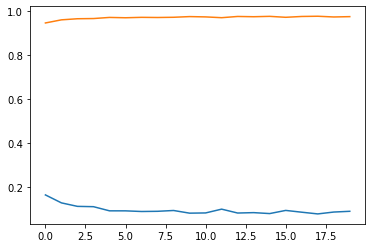

In [10]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
# Evolução do erro, azul
plt.plot(historico.history['val_loss'])
# Performance da rede
plt.plot(historico.history['val_accuracy'])

In [11]:
# Obtenção das previsões
previsoes = modelo.predict(x_teste)
previsoes

array([[2.2457970e-13, 1.9208500e-07, 8.9065946e-09, ..., 9.9997365e-01,
        2.3967406e-11, 2.5874671e-05],
       [2.8750556e-11, 3.6439499e-10, 9.9999964e-01, ..., 3.2471961e-10,
        1.9944446e-09, 2.1677740e-14],
       [6.2210462e-12, 9.9999845e-01, 3.3756667e-08, ..., 6.2122342e-07,
        8.5042132e-07, 2.8049907e-09],
       ...,
       [2.0204461e-12, 6.2610112e-12, 3.4331765e-10, ..., 3.7484442e-09,
        4.6559666e-12, 2.1799524e-05],
       [1.7039231e-13, 7.4803248e-14, 2.4157723e-15, ..., 4.7411200e-17,
        4.1075969e-11, 7.1155447e-12],
       [2.8922193e-13, 2.9133285e-18, 9.4375154e-17, ..., 2.6218352e-23,
        1.6683149e-15, 5.1336384e-15]], dtype=float32)

In [12]:
# Valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 970,    1,    2,    0,    0,    2,    3,    1,    1,    0],
       [   0, 1125,    3,    2,    0,    1,    2,    0,    2,    0],
       [   1,    0, 1012,    3,    3,    3,    1,    4,    5,    0],
       [   0,    0,    4,  995,    0,    5,    0,    3,    2,    1],
       [   0,    0,    3,    1,  960,    0,    5,    0,    0,   13],
       [   3,    0,    0,   12,    1,  870,    4,    0,    0,    2],
       [   6,    3,    0,    0,    6,    5,  936,    0,    1,    1],
       [   2,    3,   11,    4,    3,    0,    0,  999,    1,    5],
       [   3,    4,    6,    9,    5,   10,    4,    4,  925,    4],
       [   2,    2,    1,   12,   12,    3,    0,    4,    1,  972]],
      dtype=int64)

In [13]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
# Número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
# Passo a mesma posição para o modelo prever
novo = x_treinamento[20]
# De matriz para vetor
novo = np.expand_dims(novo, axis = 0)
# Previsão
pred = modelo.predict(novo)
# Maior valor
pred = [np.argmax(pred) for t in pred]
pred

[4]